# How to install:

```bash
bash$: conda create -n astrohack python=3.6
bash$: conda activate astrohack
bash$: pip install astrohack
```

# Start Dask Cluster

In [8]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(
        n_workers=12,
        threads_per_worker=1,
        memory_limit='21GB'
    )

client = Client(cluster) 
print(client.dashboard_link)

http://127.0.0.1:8787/status


# Create holog_obs_description

```
holog_obs_description = {0 :
                            {'scans':[2,4,6,8,10,12,14,16,18,20,22],
                             'ant':{'EA25':['EA04', 'EA08', 'EA12', 'EA27', 'EA19']}
                            }
                         }
```

In [17]:
from astrohack.extract_holog import extract_holog
import numpy as np
import json

holog_obs_description = {0 :{'scans':[2,4,6,8,10,12,14,16,18,20,22],'ant':{'EA25':['EA08', 'EA04', 'EA12', 'EA27', 'EA19', 'EA07', 'EA21', 'EA03', 'EA11', 'EA05', 'EA01', 'EA09', 'EA24', 'EA22', 'EA14', 'EA18', 'EA02']}}}

print(json.dumps(holog_obs_description, indent=2, default=str))

{
  "0": {
    "scans": [
      2,
      4,
      6,
      8,
      10,
      12,
      14,
      16,
      18,
      20,
      22
    ],
    "ant": {
      "EA25": [
        "EA08",
        "EA04",
        "EA12",
        "EA27",
        "EA19",
        "EA07",
        "EA21",
        "EA03",
        "EA11",
        "EA05",
        "EA01",
        "EA09",
        "EA24",
        "EA22",
        "EA14",
        "EA18",
        "EA02"
      ]
    }
  }
}


# Extract Holog

In [18]:
from astrohack.extract_holog import extract_holog
extract_holog(
    ms_name='/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.ms', 
    holog_name='/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small', 
    holog_obs_dict=holog_obs_description,
    data_col='DATA',
    subscan_intent='MIXED',
    parallel=True,
    overwrite=True,
    sel_ddi=np.arange(16)
)

[2023-03-07 09:37:49.764998 Warning]: [extract_holog] Warning, current holography files will be overwritten.
[2023-03-07 09:37:50.152865 System Info]: Opening measurement file /.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.ms/DATA_DESCRIPTION
[2023-03-07 09:37:50.177852 System Info]: Processing ddi: 0, scans: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
[2023-03-07 09:37:50.179674 System Info]: Processing ddi: 1, scans: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
[2023-03-07 09:37:50.180716 System Info]: Processing ddi: 2, scans: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
[2023-03-07 09:37:50.181516 System Info]: Processing ddi: 3, scans: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
[2023-03-07 09:37:50.182323 System Info]: Processing ddi: 4, scans: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
[2023-03-07 09:37:50.183122 System Info]: Processing ddi: 5, scans: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
[2023-03-07 09:37:50.184032 System Info]: Processing ddi: 6, scans: [2, 4, 6, 8, 10, 12, 14, 1

In [ ]:
from astrohack.dio import _load_pnt_dict
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
pnt_ds = _load_pnt_dict('/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.point.zarr')

pnt_ds
ant_id = 3
plt.figure()
plt.scatter(pnt_ds[ant_id].DIRECTIONAL_COSINES[:,0],pnt_ds[ant_id].DIRECTIONAL_COSINES[:,1])
plt.show()

plt.figure()
plt.plot(pnt_ds[ant_id].DIRECTIONAL_COSINES[:,0])
plt.plot(pnt_ds[ant_id].DIRECTIONAL_COSINES[:,1])
plt.show()

ds = xr.open_zarr('/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.holog.zarr/1/0/24')
plt.figure()
plt.scatter(ds.DIRECTIONAL_COSINES[:,0],ds.DIRECTIONAL_COSINES[:,1])
plt.show()

# Holog

In [20]:
from astrohack import holog
grid_size = None
cell_size = None
grid_interpolation_mode = 'linear' #'nearest' 'linear' 'cubic'
chan_average = True
chan_tolerance_factor = 0.005
reference_scaling_frequency = None #1.5*10**10 #None #In Hz
#spw_average if True users has to give reference_scaling_frequency
scan_average = True

holog(holog_file='/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.holog.zarr', padding_factor=50, 
      parallel=True,
      grid_size=grid_size, cell_size=cell_size, grid_interpolation_mode=grid_interpolation_mode,
      chan_average = chan_average, chan_tolerance_factor = chan_tolerance_factor,
      reference_scaling_frequency=reference_scaling_frequency,
      scan_average = scan_average,
     )

[2023-03-07 09:38:21.906425 System Info]: Loading holography file /.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.holog.zarr ...
[2023-03-07 09:38:21.909682 System Info]: Cell size: [0.00062476 0.00062476] Grid size [31 31]
[2023-03-07 09:38:21.909702 System Info]: Processing ant_id: 24


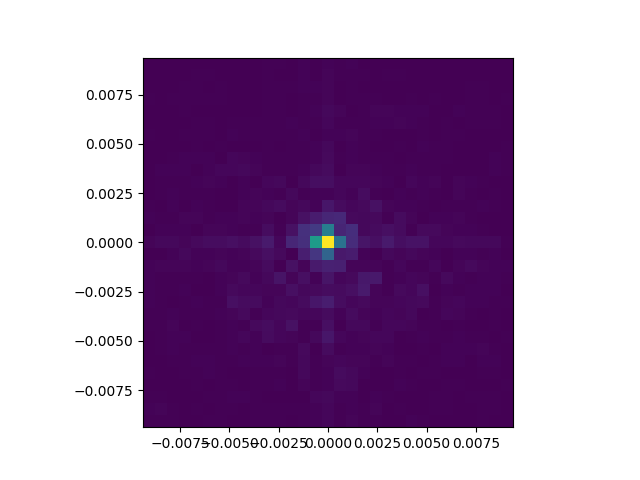

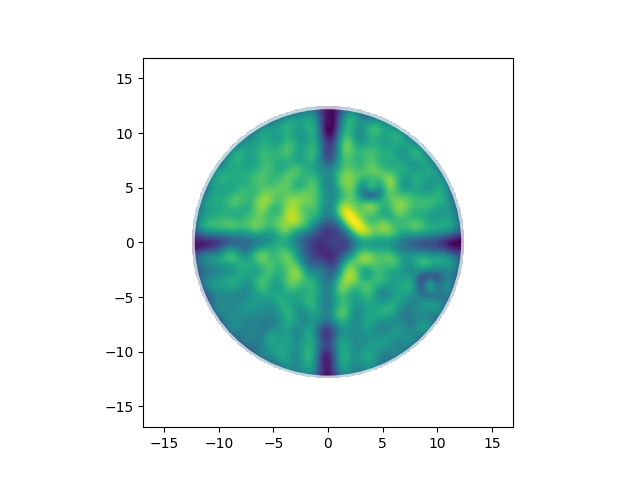

In [25]:
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.patches as patches

ds = xr.open_zarr('/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.image.zarr/24/1')
wavelength = scipy.constants.speed_of_light/ds.chan.values[0]
l = ds.l.values
m = ds.m.values
u = ds.u.values*wavelength
v = ds.v.values*wavelength

plt.figure()
plt.imshow(np.abs(ds.BEAM[0,0,0,:,:]),extent=[l.min(), l.max(), m.min(), m.max()])
plt.show()

circle = patches.Circle((0,0), 12.5, fill=False, color='white', alpha=0.7, linewidth=5)

fig, ax =plt.subplots()
plt.imshow(np.abs(ds.APERTURE[0,0,0,:,:]),extent=[u.min(), u.max(), v.min(), v.max()])
ax.add_patch(circle)
plt.show()

# Panel

In [22]:
from astrohack.panel import panel
image = '/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small'
#ddi = [1] 
ddi = None
panel_kind = 'rigid'

panel(
    holog_image=image, 
    panel_kind=panel_kind,
    outfile='/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small',
    aipsdata=False, 
    unit='miliinches', 
    save_mask=True,
    save_phase=True,
    parallel=True
)

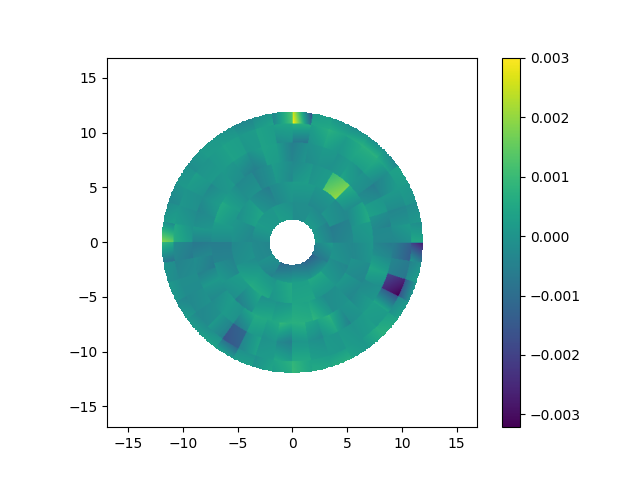

In [23]:
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

ds = xr.open_zarr('/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.panel.zarr/VLA_EA25/1/xds.zarr')

u = ds.u.values
v = ds.v.values

plt.figure()
plt.imshow(ds.CORRECTIONS,extent=[u.min(), u.max(), v.min(), v.max()])
plt.colorbar()
plt.show()

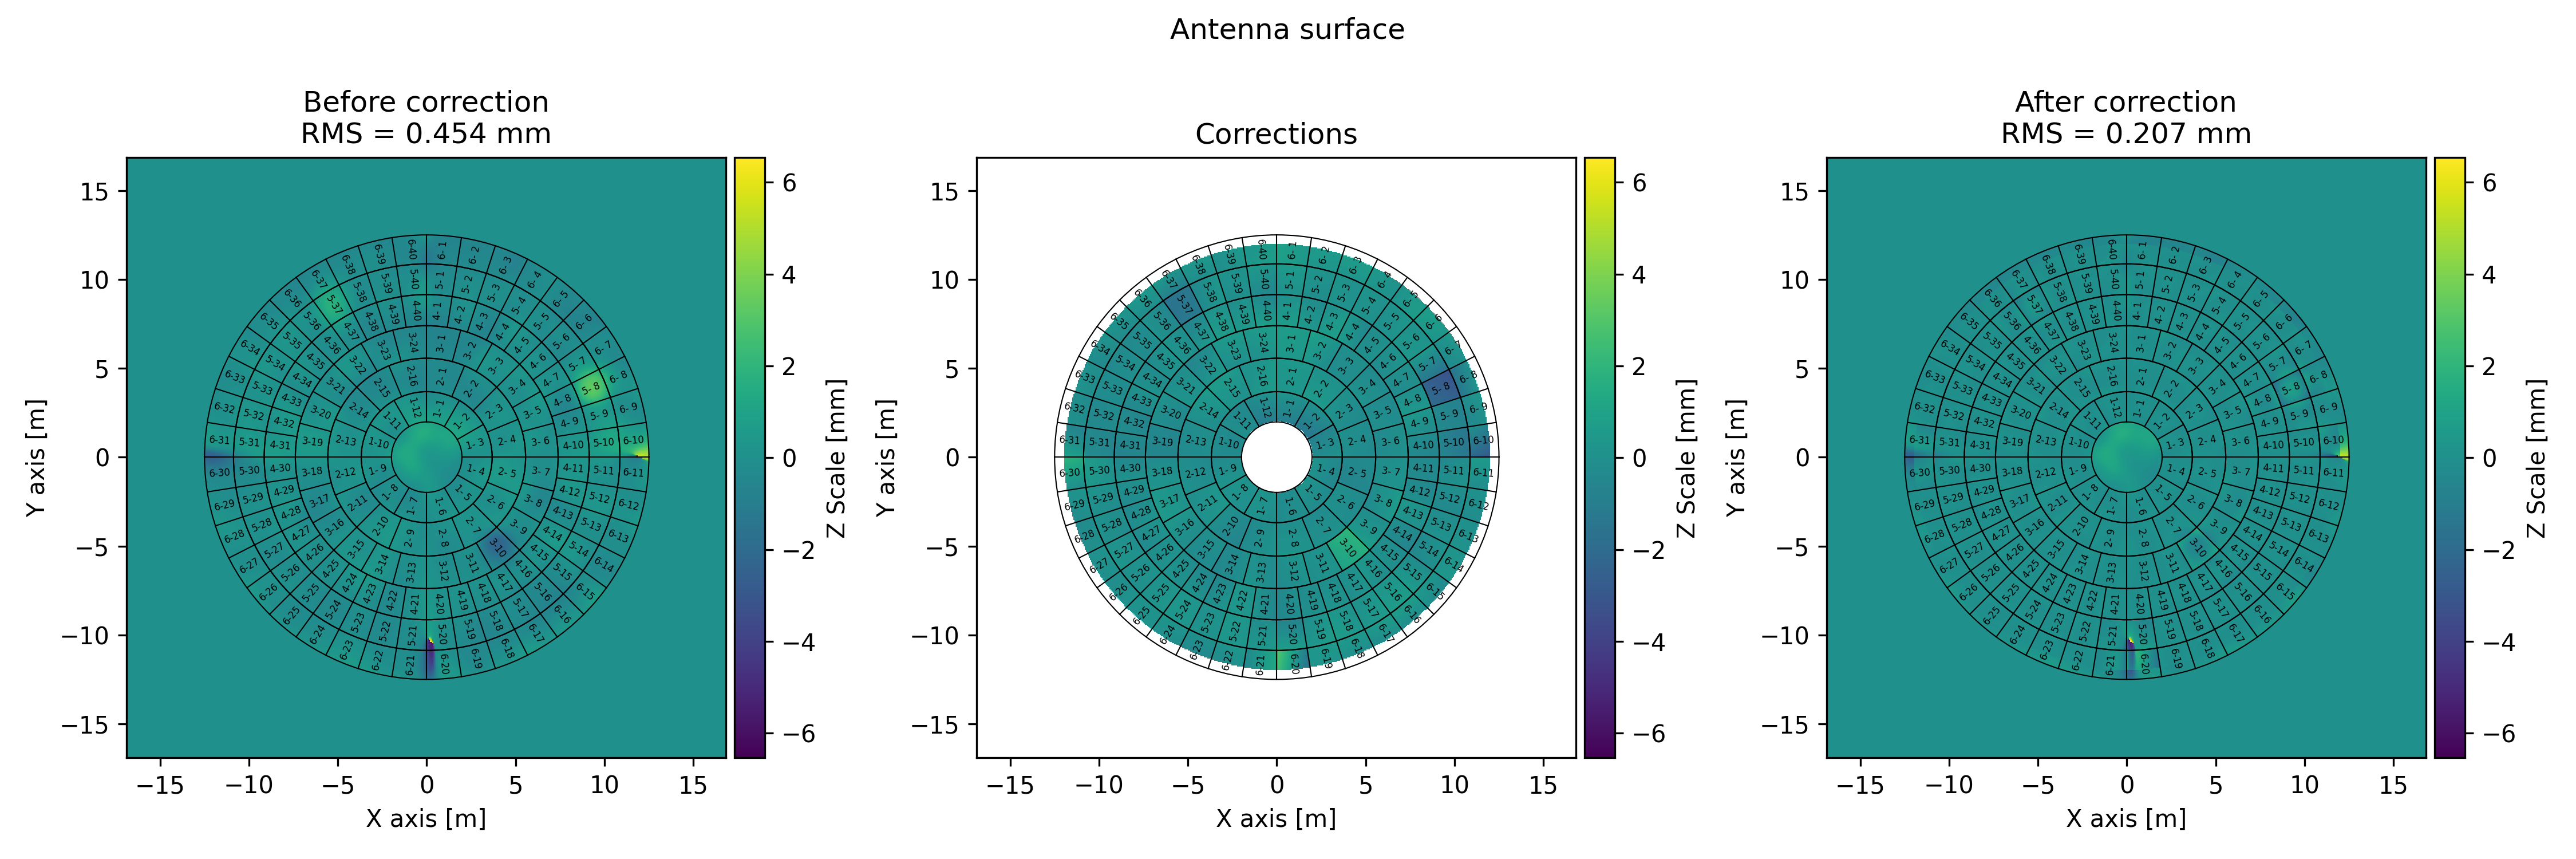

In [24]:
from IPython.display import Image
Image(filename = "/.lustre/cv/projects/casa/holo/demo/ea25/ea25_cal_small.panel.zarr/VLA_EA25/1/surface.png", width=1000, height=1000)